In [1]:
### importing the libraries
#### numply for
import numpy as np
import scipy.stats as stats
import math
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
##import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns 
### missingno is a Python library for visualizing missing data in a dataset.
import missingno as msno

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
### load the dataset
data=pd.read_csv("StudentsPerformance.csv")
data2=data
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [99]:
####
data.info()
####shows that of all 1000 records we dont have non-null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


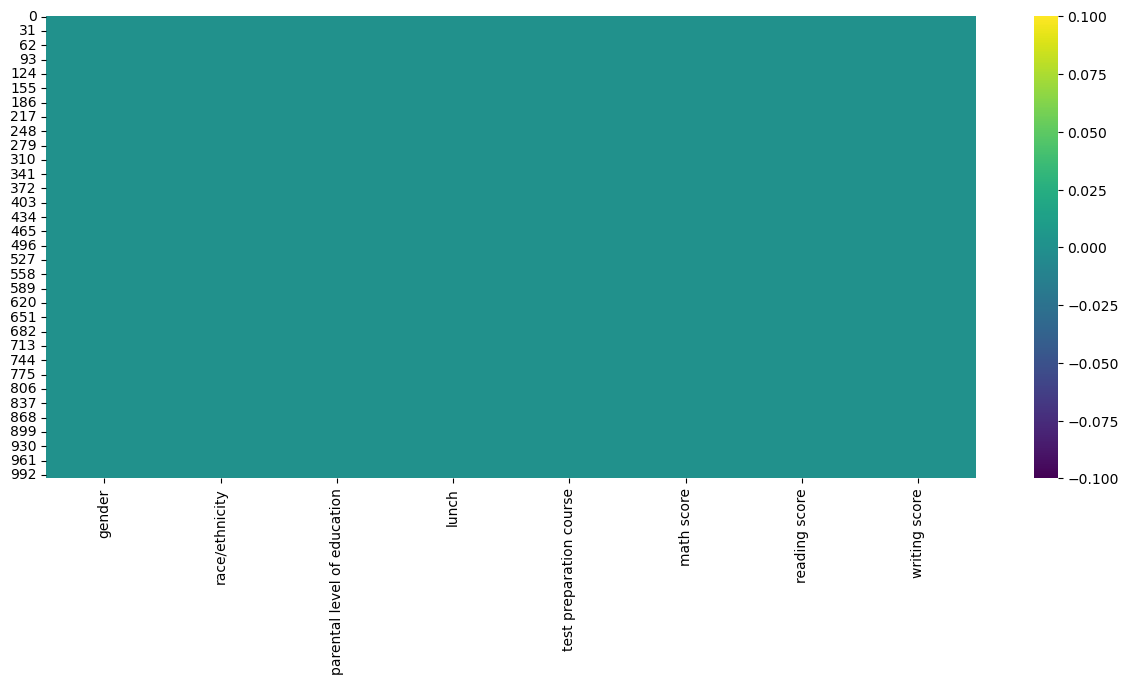

In [100]:
plt.figure(figsize=(15, 6))
sns.heatmap(data.isnull(), cmap="viridis")
plt.show()
### graph below shows that we dont have any null value

## Data Visualization

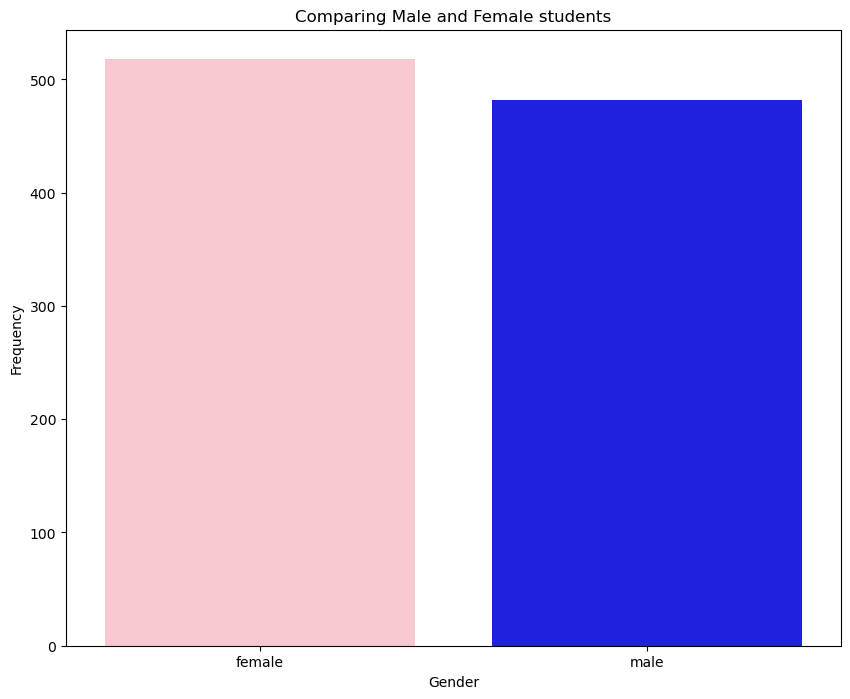

In [101]:
###Comparing Male and Female students
plt.subplots(figsize=(10, 8))
# palette={'male': 'blue', 'female': 'pink'} assigns colors to each category
sns.countplot(x='gender', data=data, palette={'male': 'blue', 'female': 'pink'})
plt.title('Comparing Male and Female students')
plt.xlabel("Gender")
plt.ylabel("Frequency")

plt.show()


lunch
standard        645
free/reduced    355
Name: count, dtype: int64


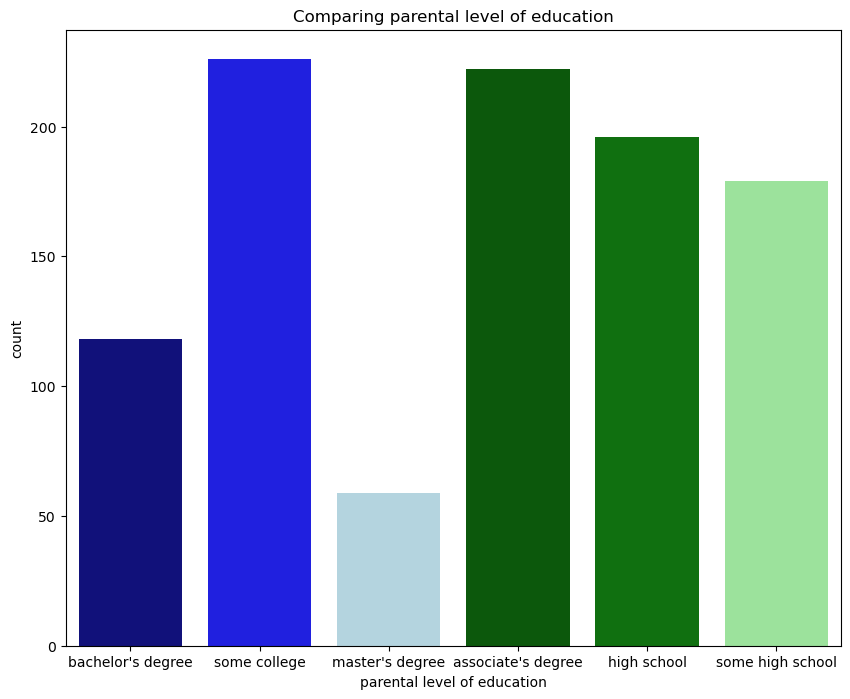

In [119]:
###Comparing parent level of eduaction
unique_subcategories = data['parental level of education'].unique()
unique_subcategories
education_counts = data['lunch'].value_counts()
print(education_counts)
plt.subplots(figsize=(10,8))
sns.countplot(x='parental level of education', data=data, palette={"bachelor's degree": 'darkblue', 'some college': 'blue',"master's degree": 'lightblue',"associate's degree":'darkgreen','high school':'green', 'some high school':'lightgreen'})
plt.title("Comparing parental level of education")
plt.show()


In [144]:
data['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

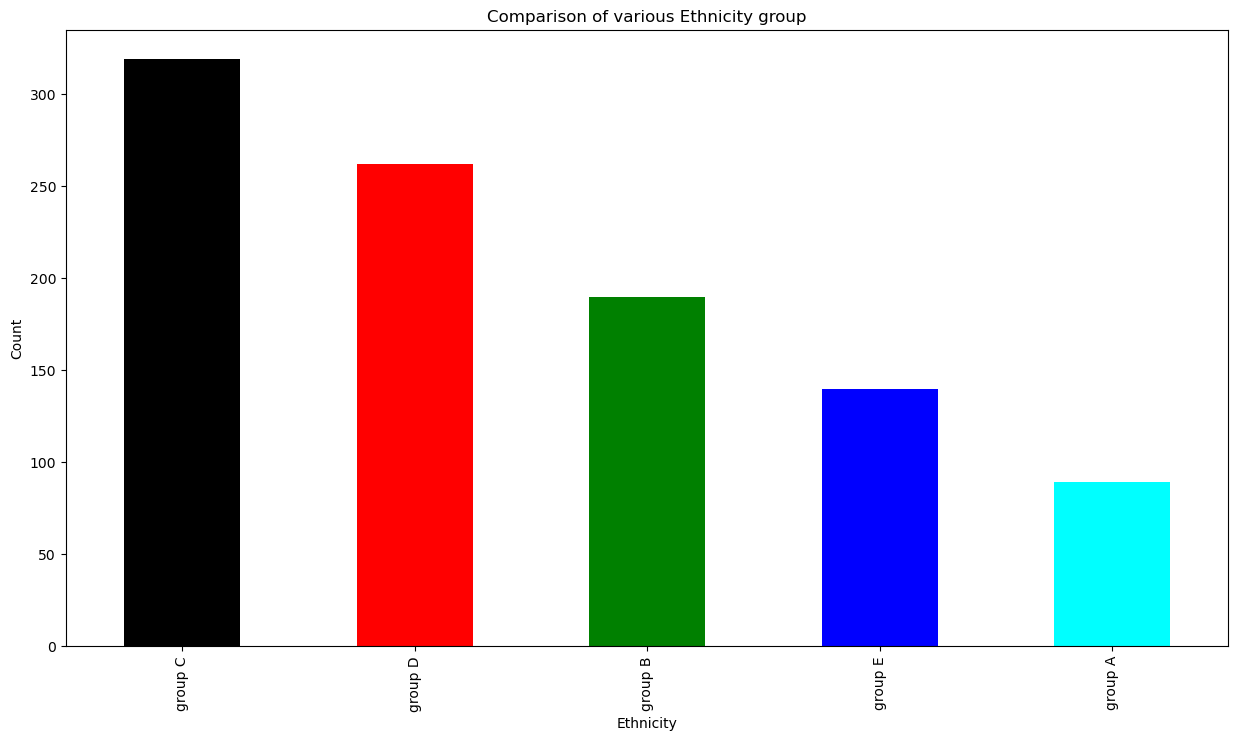

In [103]:
#visualizing the difference groups in the dataset
plt.subplots(figsize=(15,8))
data['race/ethnicity'].value_counts(normalize=True)
data['race/ethnicity'].value_counts(dropna=False).plot.bar(color=['black','red','green','blue','cyan'])
plt.title("Comparison of various Ethnicity group")
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()

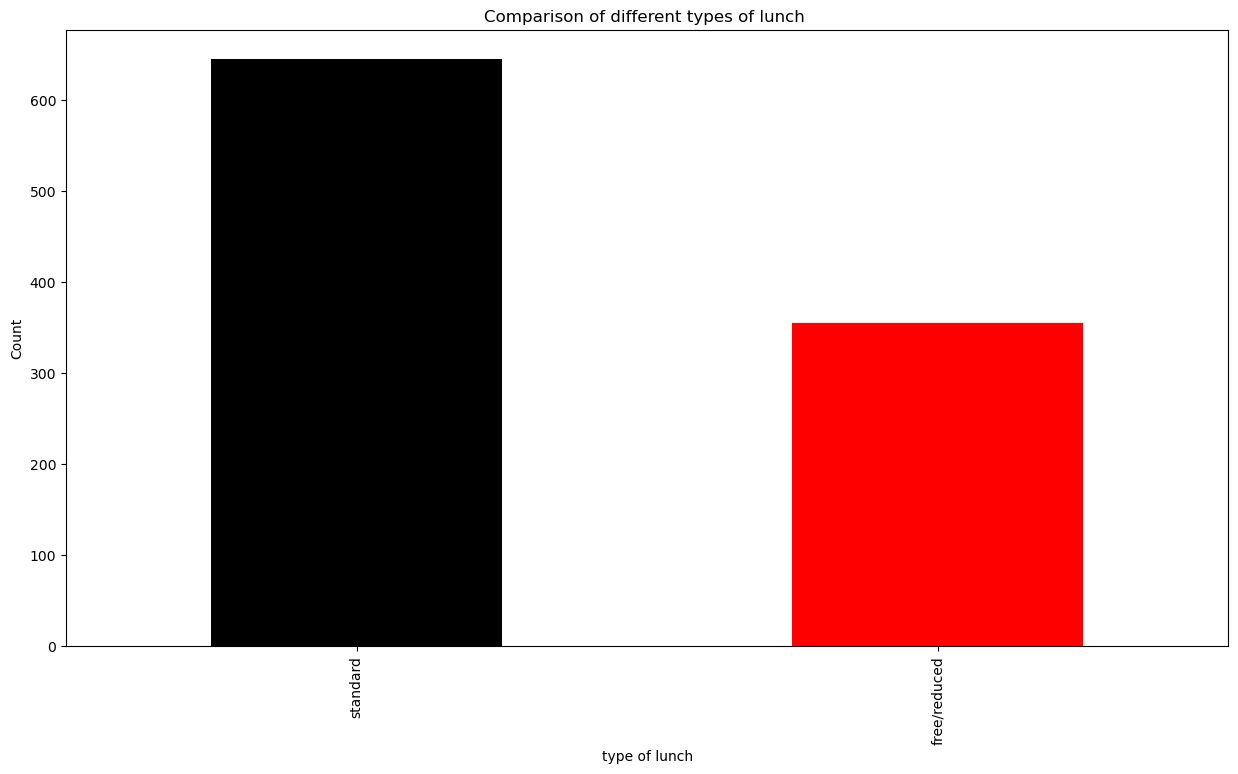

In [104]:
#visualizing the difference of whether they received lunch or standard
plt.subplots(figsize=(15,8))
data['lunch'].value_counts(normalize=True)
data['lunch'].value_counts(dropna=False).plot.bar(color=['black','red'])
plt.title("Comparison of different types of lunch ")
plt.xlabel('type of lunch')
plt.ylabel('Count')
plt.show()

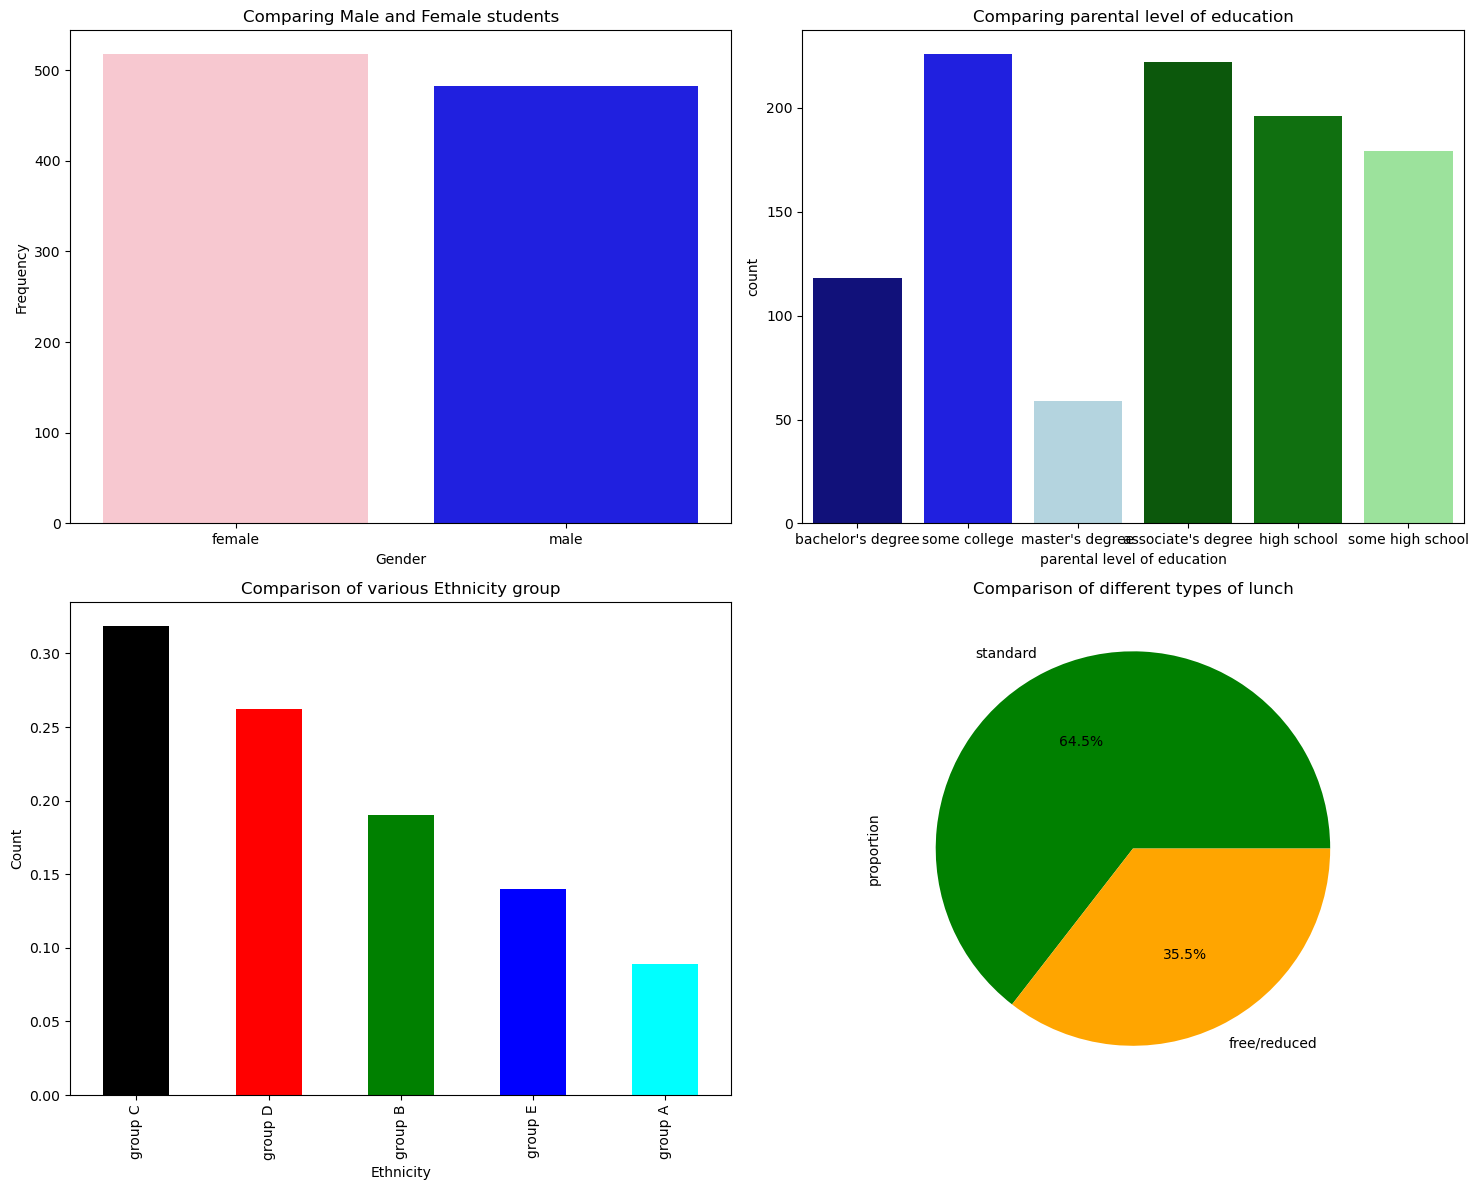

In [138]:


# Set up the subplots grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Plot 1: Comparing Male and Female students
sns.countplot(x='gender', data=data, palette={'male': 'blue', 'female': 'pink'}, ax=axes[0, 0])
axes[0, 0].set_title('Comparing Male and Female students')
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Frequency")

# Plot 2: Comparing parent level of education
sns.countplot(x='parental level of education', data=data, palette={
    "bachelor's degree": 'darkblue',
    'some college': 'blue',
    "master's degree": 'lightblue',
    "associate's degree": 'darkgreen',
    'high school': 'green',
    'some high school': 'lightgreen'}, ax=axes[0, 1])
axes[0, 1].set_title("Comparing parental level of education")

# Plot 3: Comparison of various Ethnicity group
data['race/ethnicity'].value_counts(normalize=True).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'], ax=axes[1, 0])
axes[1, 0].set_title("Comparison of various Ethnicity group")
axes[1, 0].set_xlabel('Ethnicity')
axes[1, 0].set_ylabel('Count')

# Plot 4: Comparison of different types of lunch
data['lunch'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', colors=['green', 'orange'], ax=axes[1, 1])
axes[1, 1].set_title("Comparison of different types of lunch")

# Adjust layout


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


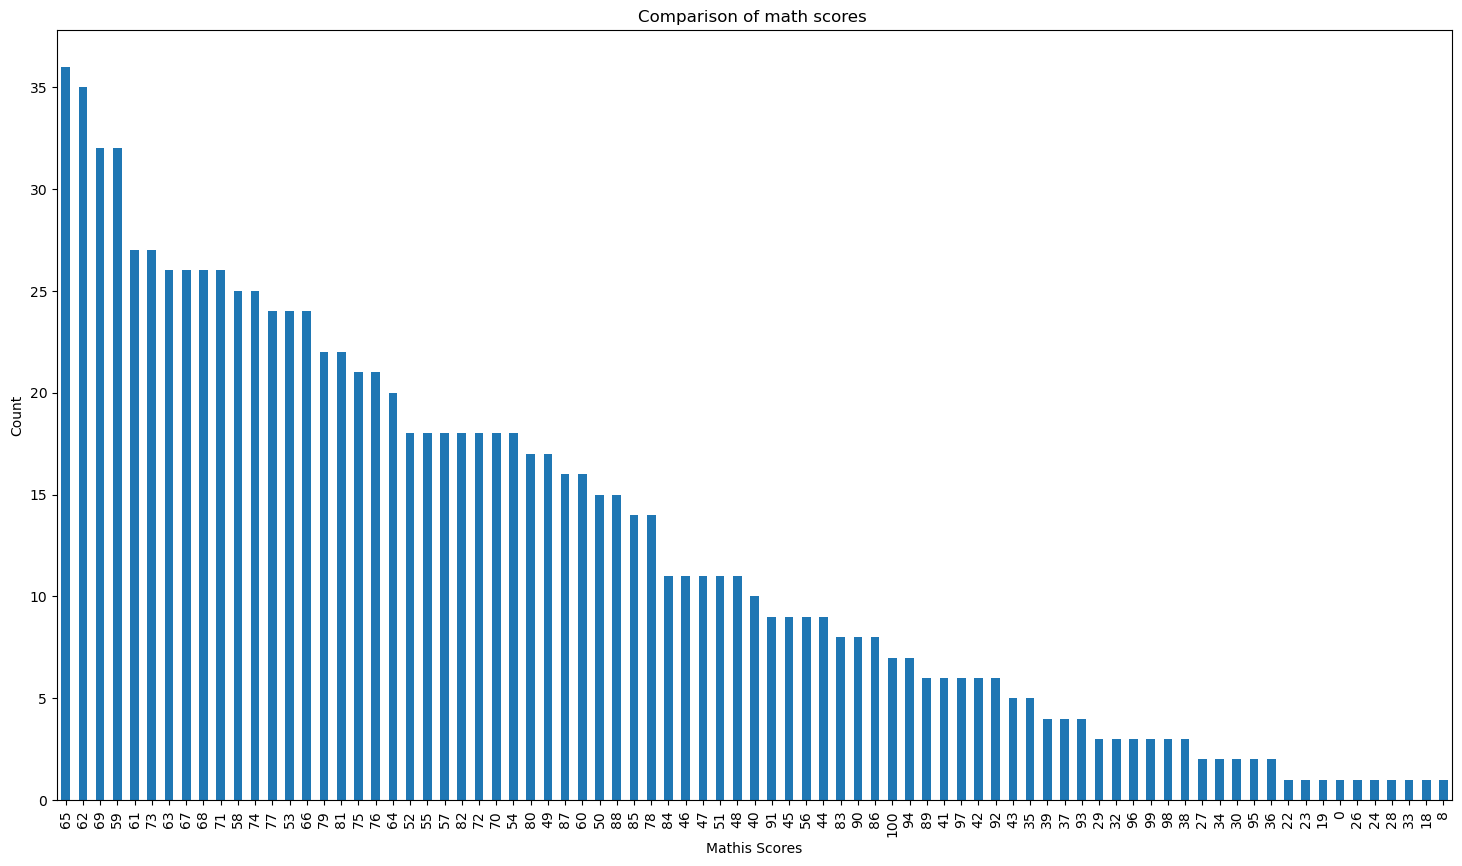

In [54]:
### Visualizing maths score
plt.subplots(figsize=(15,8))
data['math score'].value_counts(normalize=True)
data['math score'].value_counts(dropna=False).plot.bar(figsize=(18,10))
plt.title("Comparison of math scores ")
plt.xlabel('Mathis Scores')
plt.ylabel('Count')
plt.show()

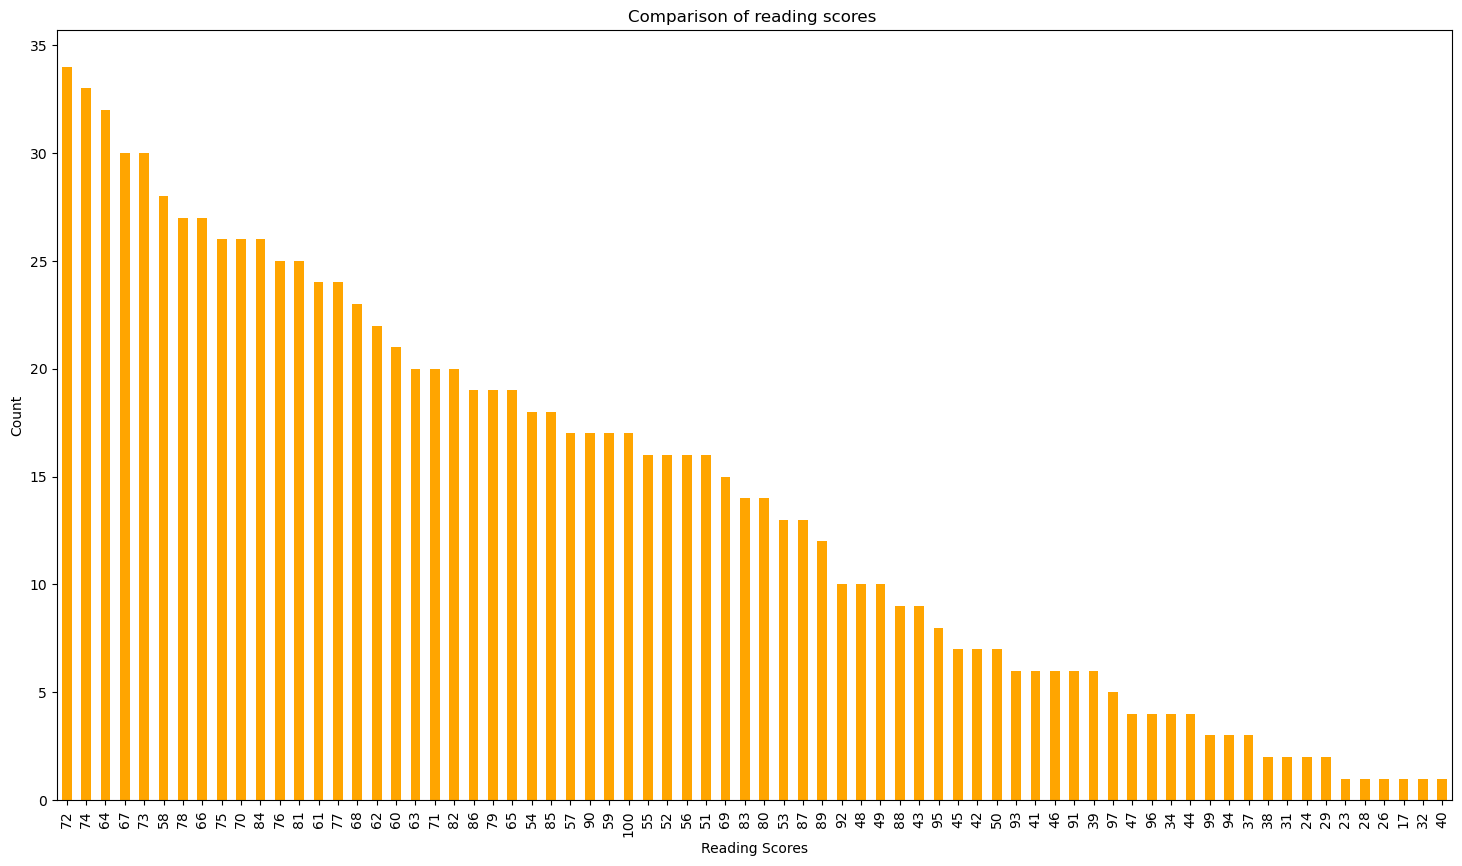

In [57]:
### Visualizing reading score
plt.subplots(figsize=(15,8))
data['reading score'].value_counts(normalize=True)
data['reading score'].value_counts(dropna=False).plot.bar(figsize=(18,10), color='orange')
plt.title("Comparison of reading scores ")
plt.xlabel('Reading Scores')
plt.ylabel('Count')
plt.show()

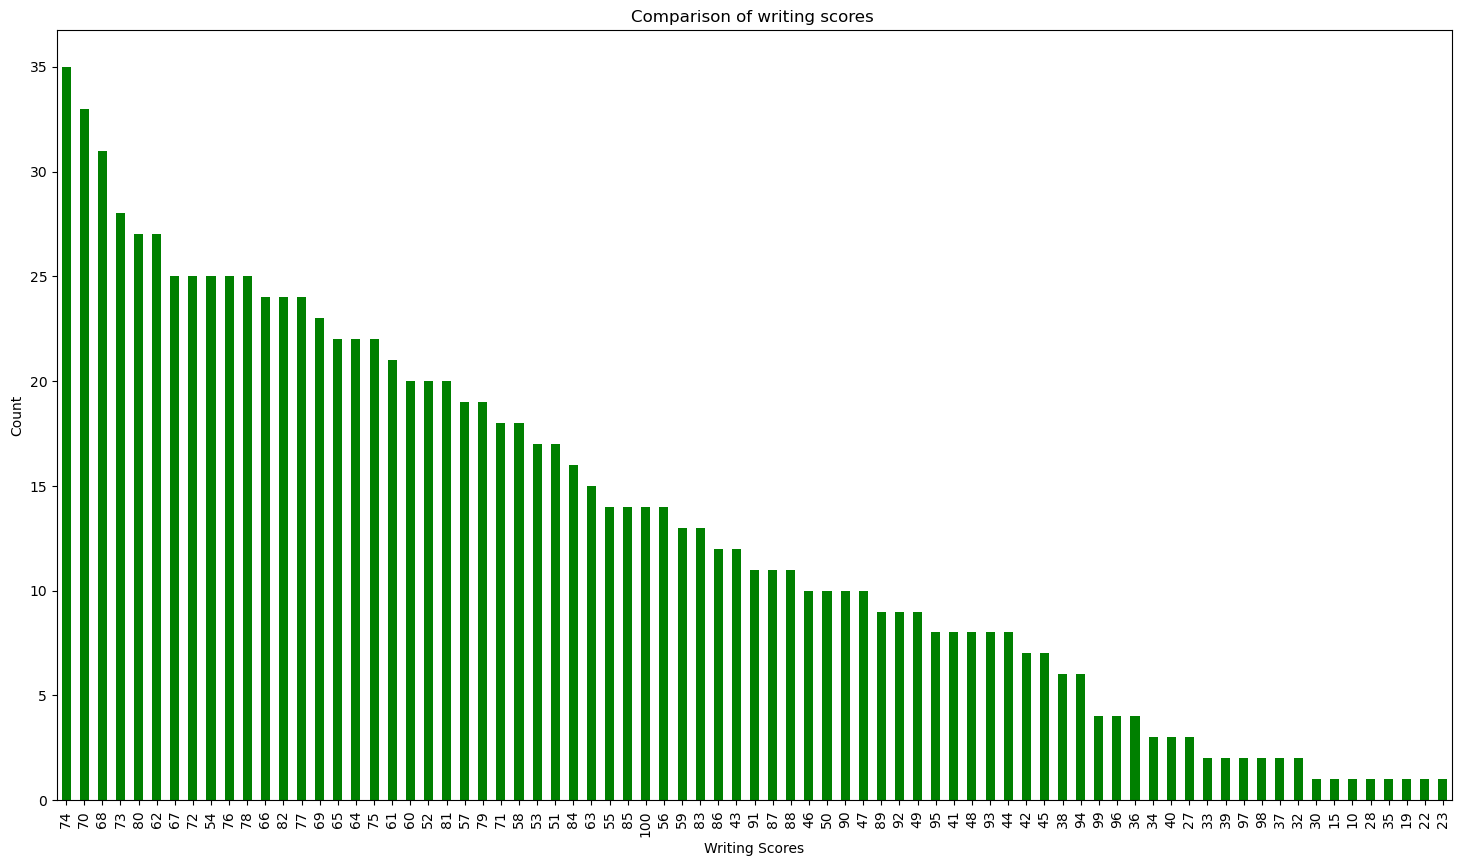

In [58]:
### Visualizing maths score
plt.subplots(figsize=(15,8))
data['writing score'].value_counts(normalize=True)
data['writing score'].value_counts(dropna=False).plot.bar(figsize=(18,10),color='green')
plt.title("Comparison of writing scores ")
plt.xlabel('Writing Scores')
plt.ylabel('Count')
plt.show()

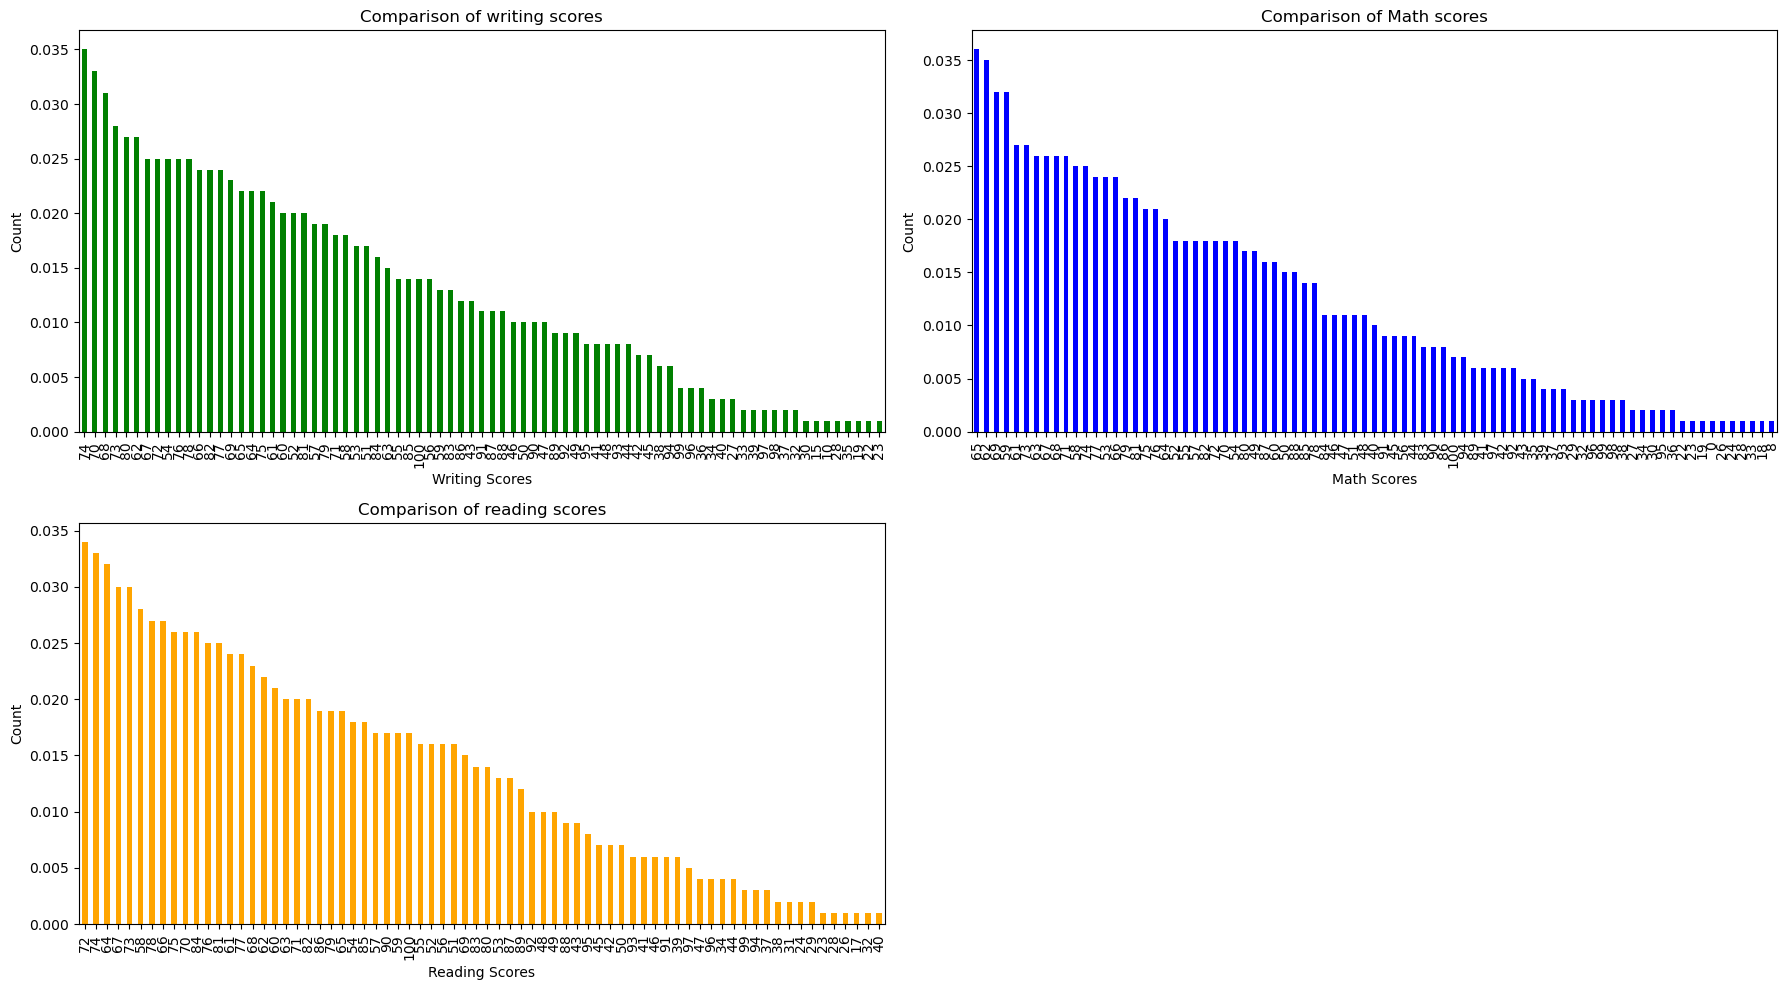

In [124]:
### Visualizing maths score


# Set up the subplots grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 15))




# Plot 1: Comparison of writing scores
data['writing score'].value_counts(normalize=True).plot.bar(figsize=(18, 10), color='green', ax=axes[0, 0])

axes[0, 0].set_title("Comparison of writing scores")
axes[0, 0].set_xlabel('Writing Scores')
axes[0, 0].set_ylabel('Count')

# Plot 2: Comparison of reading scores
data['reading score'].value_counts(normalize=True).plot.bar(figsize=(18, 10), color='orange', ax=axes[1, 0])
axes[1, 0].set_title("Comparison of reading scores")
axes[1, 0].set_xlabel('Reading Scores')
axes[1, 0].set_ylabel('Count')
# Plot 3: Comparison of reading scores
data['math score'].value_counts(normalize=True).plot.bar(figsize=(18, 10), color='blue', ax=axes[0, 1])
axes[0, 1].set_title("Comparison of Math scores")
axes[0, 1].set_xlabel('Math Scores')
axes[0, 1].set_ylabel('Count')
# Adjust layout
axes[1, 1].axis('off')

plt.tight_layout()

# Show the plots
plt.show()


## Maximum Score of students in all the three subjects 

C:\Users\hamis\AppData\Local\Temp\ipykernel_38028\3293000512.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, 1)


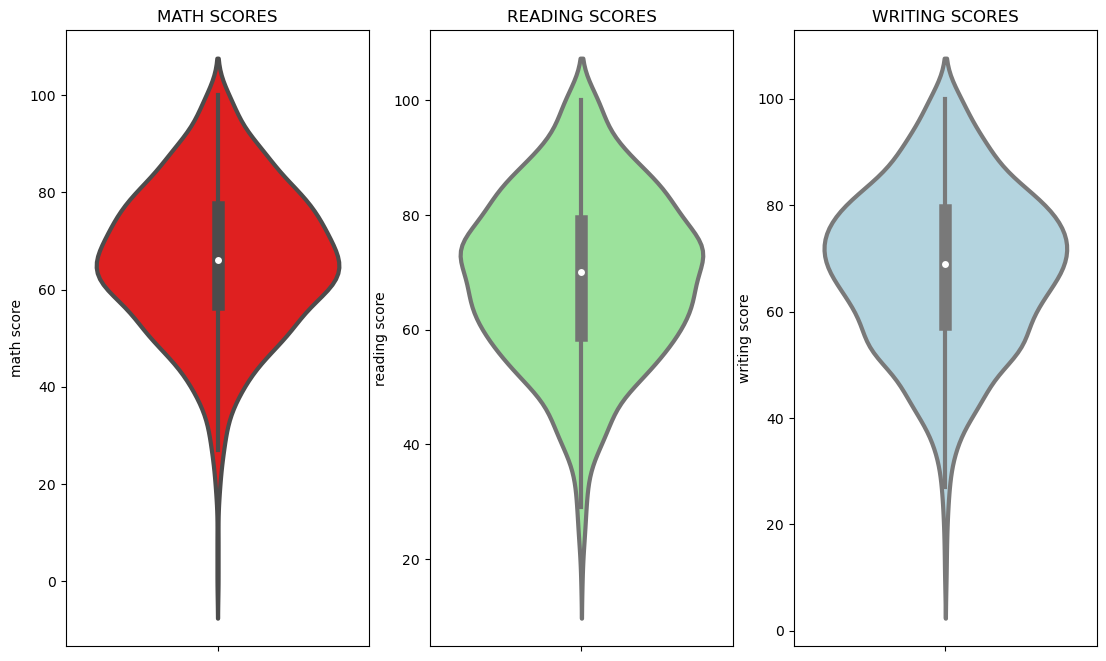

In [13]:


plt.subplots(figsize=(18,8))
 
plt.subplot(1, 4, 1) 
plt.title('MATH SCORES') 
sns.violinplot(y='math score',data=data2,color='red',linewidth=3) 
plt.subplot(1, 4, 2) 
plt.title('READING SCORES') 
sns.violinplot(y='reading score',data=data2,color='lightgreen',linewidth=3) 

plt.subplot(1, 4, 3) 
plt.title('WRITING SCORES') 
sns.violinplot(y='writing score',data=data2,color='lightblue',linewidth=3) 

plt.show()

## OUTLIERS

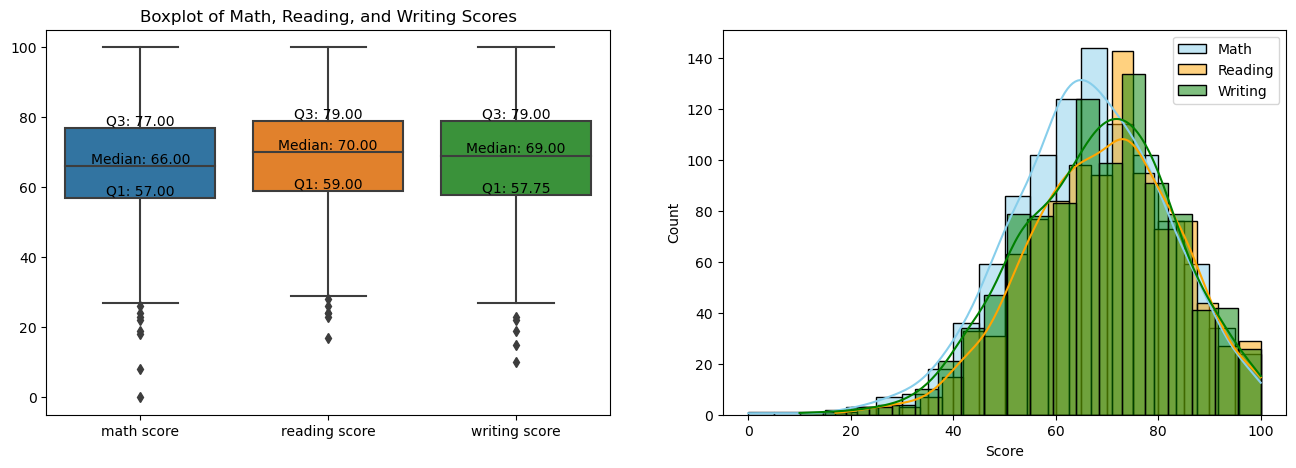

In [4]:
plt.figure(figsize=(16, 5))

# Math scores
plt.subplot(1, 2, 1)
scores_df = data[['math score', 'reading score', 'writing score']]
sns.boxplot(data=scores_df)
for i, col in enumerate(['math score', 'reading score', 'writing score']):
    plt.text(i, score_summary.loc['25%', col], f'Q1: {score_summary.loc["25%", col]:.2f}', ha='center', va='bottom')
    plt.text(i, score_summary.loc['50%', col], f'Median: {score_summary.loc["50%", col]:.2f}', ha='center', va='bottom')
    plt.text(i, score_summary.loc['75%', col], f'Q3: {score_summary.loc["75%", col]:.2f}', ha='center', va='bottom')

plt.title('Boxplot of Math, Reading, and Writing Scores')

# Additional subplot for histograms
plt.subplot(1, 2, 2)
sns.histplot(data['math score'], bins=20, kde=True, color='skyblue', label='Math')
sns.histplot(data['reading score'], bins=20, kde=True, color='orange', label='Reading')
sns.histplot(data['writing score'], bins=20, kde=True, color='green', label='Writing')
plt.legend()

# Update x-axis label
plt.xlabel('Score')

plt.show()


In [69]:
np.random.seed(6)
### 100 sample values of math score from dataset
sample_math_marks=np.random.choice(data['math score'], size=100)
print ("\nSample mean for math scores: ",sample_math_marks.mean())
print ("\nPopulation mean for math scores: ",data["math score"].mean())


### 100 sample values of reading score from dataset
sample_reading_marks=np.random.choice(data['reading score'], size=100)
print ("\nSample mean for Reading scores: ",sample_reading_marks.mean())
print ("\nPopulation mean for Reading scores: ",data["reading score"].mean())

### 100 sample values of Writing score from dataset
sample_writing_marks=np.random.choice(data['writing score'], size=100)
print ("\nSample mean for Writing scores: ",sample_writing_marks.mean())
print ("\nPopulation mean for Writing scores: ",data["writing score"].mean())



Sample mean for math scores:  63.12

Population mean for math scores:  66.089

Sample mean for Reading scores:  68.5

Population mean for Reading scores:  69.169

Sample mean for Writing scores:  71.46

Population mean for Writing scores:  68.054


## Checking the Confidence Interval for Math Score

In [70]:


np.random.seed(10)

### sample 
sample_size=1000
sample=np.random.choice(a=data["math score"], size=sample_size)
sample_mean=sample.mean()

Z_critical=stats.norm.ppf(q=0.95)
print("Z-critical value: ", Z_critical)

## get population standard deviation 
pop_stdev=data["math score"].std()

### checking margin of error
margin_of_error=Z_critical*(pop_stdev/math.sqrt(sample_size))

### cofidence interval 
confidence_interval=(sample_mean-margin_of_error, sample_mean+margin_of_error)

print("Confidence Interval: ", confidence_interval)
print("\n True Mean: ",format(data['math score'].mean()))

Z-critical value:  1.6448536269514722
Confidence Interval:  (64.82729483328328, 66.40470516671672)

 True Mean:  66.089


   parental level of education test preparation course  count
0           associate's degree               completed     82
1           associate's degree                    none    140
2            bachelor's degree               completed     46
3            bachelor's degree                    none     72
4                  high school               completed     56
5                  high school                    none    140
6              master's degree               completed     20
7              master's degree                    none     39
8                 some college               completed     77
9                 some college                    none    149
10            some high school               completed     77
11            some high school                    none    102


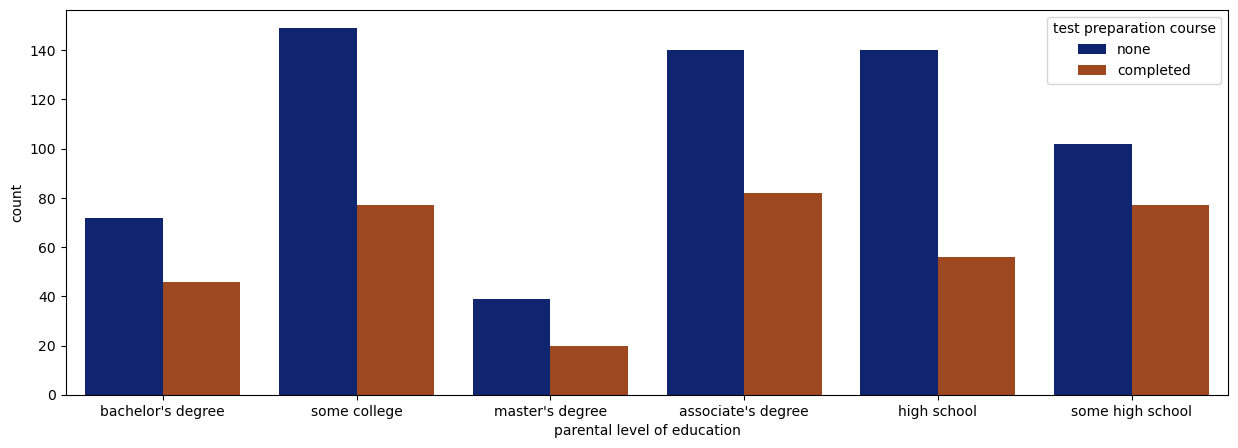

In [76]:
## Comparison of parental degree and test course 
%matplotlib inline

plt.subplots(figsize=(15,5))
education_test_counts = data2.groupby(["parental level of education", "test preparation course"]).size().reset_index(name="count")
print(education_test_counts)
sns.countplot(x="parental level of education", data=data2, hue="test preparation course", palette="dark")
plt.show()

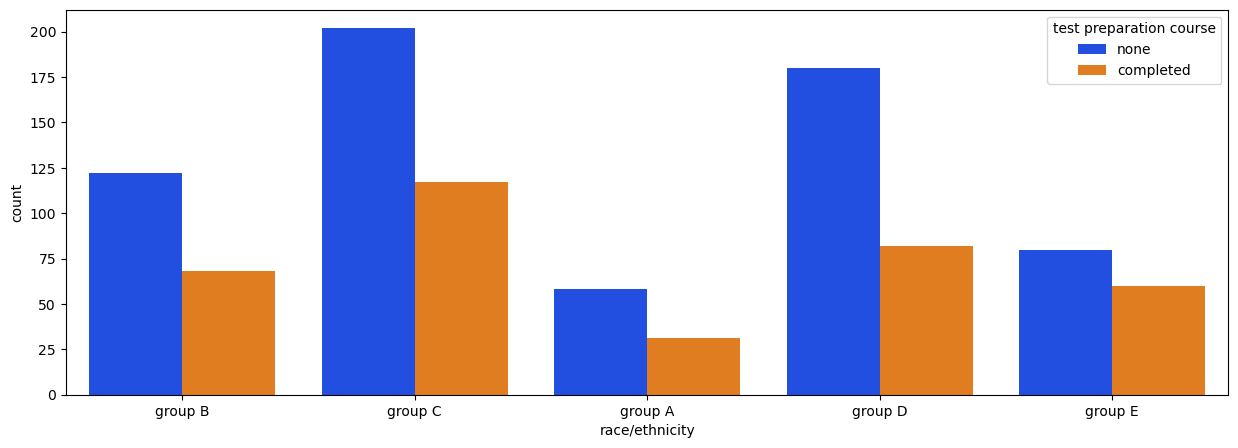

In [77]:
## Comparison of race and test course 
plt.subplots(figsize=(15,5))
sns.countplot(x="race/ethnicity", data=data2, hue="test preparation course", palette="bright")
plt.show()

C:\Users\hamis\AppData\Local\Temp\ipykernel_31160\517511277.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


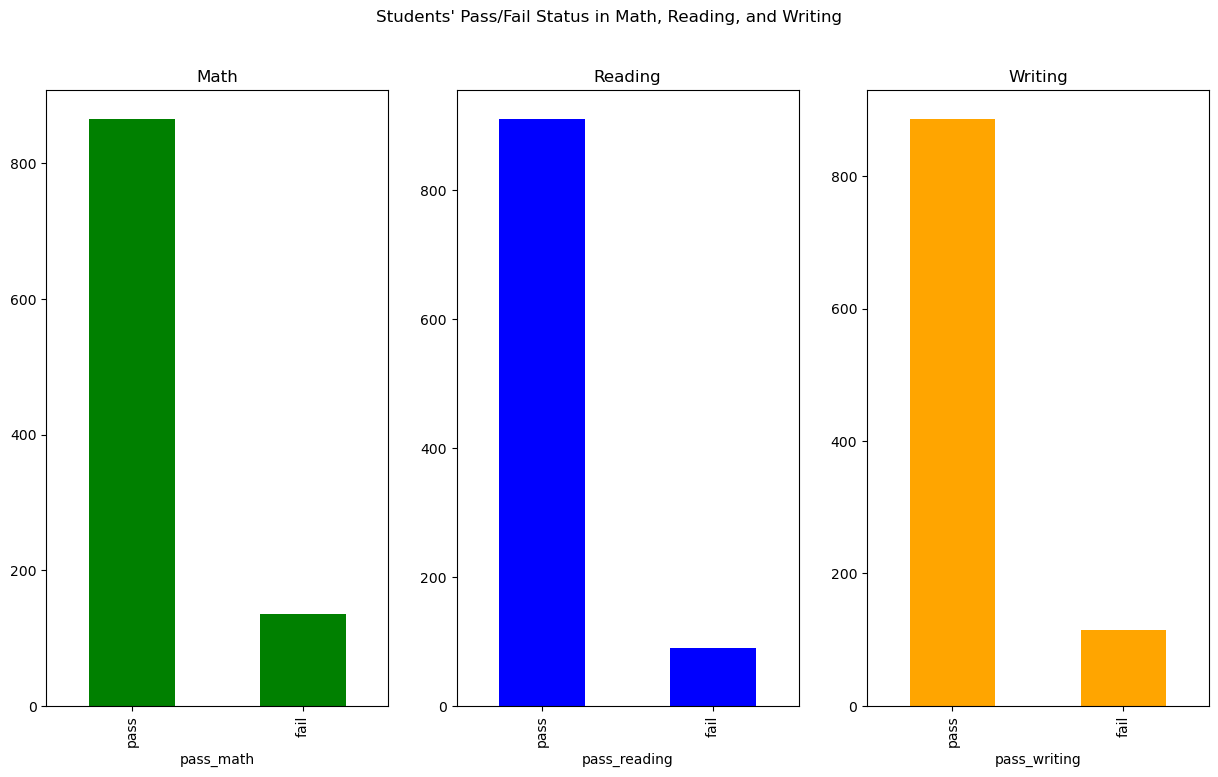

In [78]:

plt.subplots(figsize=(15, 8))

passmark = 50

# Creating new columns for pass/fail in each subject
data2["pass_math"] = np.where(data2['math score'] < passmark, "fail", "pass")
data2["pass_reading"] = np.where(data2['reading score'] < passmark, "fail", "pass")
data2["pass_writing"] = np.where(data2['writing score'] < passmark, "fail", "pass")


# Plotting side by side
plt.subplot(1, 3, 1)
data2["pass_math"].value_counts(dropna=False).plot.bar(color='green')
plt.title("Math")

plt.subplot(1, 3, 2)
data2["pass_reading"].value_counts(dropna=False).plot.bar(color='blue')
plt.title("Reading")

plt.subplot(1, 3, 3)
data2["pass_writing"].value_counts(dropna=False).plot.bar(color='orange')
plt.title("Writing")

plt.suptitle("Students' Pass/Fail Status in Math, Reading, and Writing")
plt.show()


## Data preprocessing

In [25]:
### identifying if our data columns contain missing values or null
data.isnull().sum()
#### Data engineering by creating a new variable "average score"
data['average score']=(data['math score']+data['reading score']+data['writing score'])/3
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,0,1,1,1,1,72,72,74,72.666667
1,0,2,4,1,0,69,90,88,82.333333
2,0,1,3,1,1,90,95,93,92.666667
3,1,0,0,0,1,47,57,44,49.333333
4,1,2,4,1,1,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95,94.000000
996,1,2,2,0,1,62,55,55,57.333333
997,0,2,2,0,0,59,71,65,65.000000
998,0,3,4,1,0,68,78,77,74.333333


In [145]:
data['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [177]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data, title="Profiling Report")
report.to_file("profiling_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\hamis\anaconda\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning:

There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x000001A2A8180600, file "C:\Users\hamis\anaconda\Lib\site-packages\ydata_profiling\model\pandas\correlations_pandas.py", line 164>')



Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### students performance based on gender 

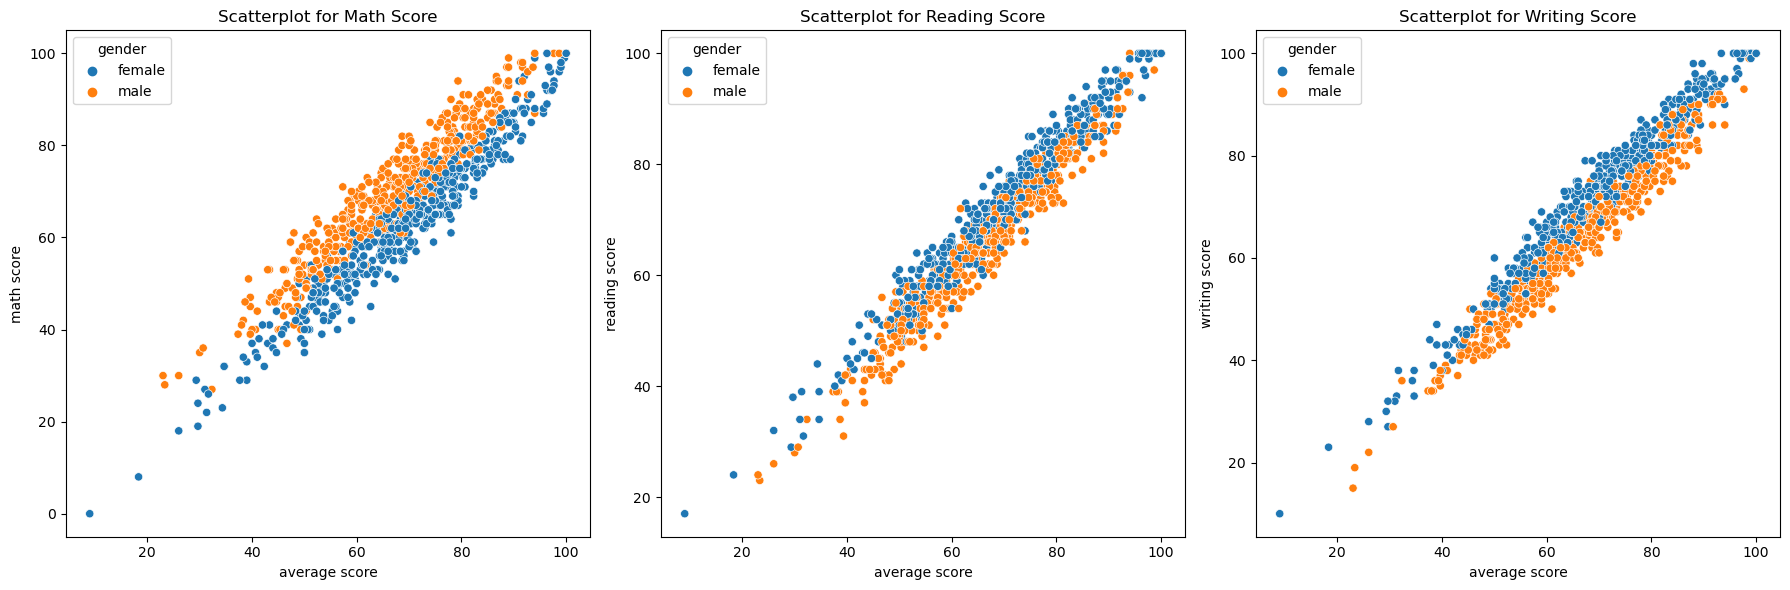

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot 1: Scatterplot for Math Score
data2['average score']=(data['math score']+data['reading score']+data['writing score'])/3

sns.scatterplot(x=data2['average score'], y=data2['math score'], hue=data2['gender'], ax=axes[0])
axes[0].set_title("Scatterplot for Math Score")

# Plot 2: Scatterplot for Reading Score
sns.scatterplot(x=data2['average score'], y=data2['reading score'], hue=data2['gender'], ax=axes[1])
axes[1].set_title("Scatterplot for Reading Score")

# Plot 3: Scatterplot for Writing Score
sns.scatterplot(x=data2['average score'], y=data2['writing score'], hue=data2['gender'], ax=axes[2])
axes[2].set_title("Scatterplot for Writing Score")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Machine learning models

In [26]:
### generating profile report after encoding
from ydata_profiling import ProfileReport
profile = ProfileReport(data, title="Profiling Report")
profile.to_file("profiling_report_after_encoding.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
# StandardScaler: Used to standardize features
# LabelEncoder: Used to convert categorical labels to numeric form
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# LinearRegression: Standard linear regression model
# Lasso: Linear regression model with L1 regularization
from sklearn.linear_model import LinearRegression, Lasso

# KNeighborsRegressor: k-nearest neighbors regression algorithm
from sklearn.neighbors import KNeighborsRegressor

# DecisionTreeRegressor: Decision tree-based regression algorithm
from sklearn.tree import DecisionTreeRegressor

# RandomForestRegressor: Ensemble regression algorithm using decision trees
# GradientBoostingRegressor: Boosting algorithm using decision trees
# AdaBoostRegressor: Adaptive boosting algorithm for regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

# XGBRegressor: XGBoost implementation for regression tasks
from xgboost import XGBRegressor

# CatBoostRegressor: CatBoost implementation for regression tasks, efficient with categorical features
from catboost import CatBoostRegressor


# Assuming 'data' is your DataFrame
encoder = LabelEncoder()
#### Encoding categorical variables
# Converting categorical variables to numeric
data['gender'] = encoder.fit_transform(data['gender'])
data['race/ethnicity'] = encoder.fit_transform(data['race/ethnicity'])
data['parental level of education'] = encoder.fit_transform(data['parental level of education'])
data['lunch'] = encoder.fit_transform(data['lunch'])
data['test preparation course'] = encoder.fit_transform(data['test preparation course'])

#Feature Scaling
# Selecting features and target variables
X = data[['math score', 'reading score', 'writing score']]
y_math = X['math score']
y_reading = X['reading score']
y_writing = X['writing score']
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Create functions for model training and evaluation
def train_and_evaluate(model, X_train, y_train, X_test, y_test, subject):
    model.fit(X_train, y_train)
    R2 = model.score(X_test, y_test)
    print(f"{subject} {model.__class__.__name__} R^2: {R2}")

# Split the data into training and testing sets
x_math_train, x_math_test, y_math_train, y_math_test = train_test_split(X[['reading score', 'writing score']], y_math, train_size=0.7)
x_reading_train, x_reading_test, y_reading_train, y_reading_test = train_test_split(X[['math score', 'writing score']], y_reading, train_size=0.7)
x_writing_train, x_writing_test, y_writing_train, y_writing_test = train_test_split(X[['math score', 'reading score']], y_writing, train_size=0.7)

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Loop through the models and evaluate them
for model_name, model in models.items():
    train_and_evaluate(model, x_math_train, y_math_train, x_math_test, y_math_test, "Math")
    train_and_evaluate(model, x_reading_train, y_reading_train, x_reading_test, y_reading_test, "Reading")
    train_and_evaluate(model, x_writing_train, y_writing_train, x_writing_test, y_writing_test, "Writing")
    print("="*50)


Math LinearRegression R^2: 0.6643483756932316
Reading LinearRegression R^2: 0.918714898291303
Writing LinearRegression R^2: 0.9034087304665187
Math Lasso R^2: 0.6596432138394598
Reading Lasso R^2: 0.9118695353328804
Writing Lasso R^2: 0.9001358879194483
Math KNeighborsRegressor R^2: 0.6105843562540513
Reading KNeighborsRegressor R^2: 0.8907478783683969
Writing KNeighborsRegressor R^2: 0.8768021177481704
Math DecisionTreeRegressor R^2: 0.45734726418554317
Reading DecisionTreeRegressor R^2: 0.8379803478976521
Writing DecisionTreeRegressor R^2: 0.8136724194821146
Math RandomForestRegressor R^2: 0.5805953361144816
Reading RandomForestRegressor R^2: 0.884053940316018
Writing RandomForestRegressor R^2: 0.8697267507601311
Math GradientBoostingRegressor R^2: 0.6482772419546873
Reading GradientBoostingRegressor R^2: 0.9098712723151686
Writing GradientBoostingRegressor R^2: 0.8860999732260024
Math XGBRegressor R^2: 0.5244379368833488
Reading XGBRegressor R^2: 0.865929584922446
Writing XGBRegress

In [17]:
### generating profile report after encoding
## This code generates a profile report for a dataset after encoding categorical variables using the ydata_profiling library. 
from ydata_profiling import ProfileReport
profile = ProfileReport(data, title="Profiling Report")
profile.to_file("profiling_report_after_encoding.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]